<a href="https://colab.research.google.com/github/nyp-sit/sdaai-pdc2-students/blob/master/iti107/session-1/first_cnn_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" align="left"/></a>

# First Convolutional Neural Network for Image Classification

In this exercise, you will learn to build your first simple Convolutional Neural Network and use it to classify images. 

You will learn: 
- how to construct a Convolutional Neural Networks 
- adjust the different hyper-parameters of the network (e.g. number of filters, number of layers, etc) and observe the effects 
- how to visualize the activations of the hidden layers 


## Fashion MNIST Dataset

We will be using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. 

![fashion-mnist](https://github.com/BellyTheMagnificent/ITI107-Deep-Learning-Networks/blob/master/session-1/images/fashion-mnist.png?raw=1)

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

|Label|Class|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|       

Let's load the data using `keras.datasets` as it is part of datasets available from keras.
For a list of dataset available from keras, see https://www.tensorflow.org/api_docs/python/tf/keras/datasets



In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print('Shape of training_images = {}'.format(training_images.shape))
print('Shape of test_images = {}'.format(test_images.shape))

4423680/4422102 [==============================] - 0s 0us/step
Shape of training_images = (60000, 28, 28)
Shape of test_images = (10000, 28, 28)


## Preprocess the images



You need to preprocess the image before using it as the input to the CNN.
CNN expects our input to be of the shape (batch, heigt, width, channels). Furthermore, the pixel values of the original image is in the range (0,255). Neural network will learn better if the input values are normalized to between (0.0, 1.0). 


In [0]:
# reshape to a 4-D tensors, with number of channel as 1, since this is a gray scale image
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# scale the input to between 0. and 1.0
training_images=training_images / 255.0
test_images=test_images/255.0


## Build your first CNN

A typical CNN consists of 1 or more blocks of Conv2D layer followed by MaxPooling2D layer. The 2D array from the last convolutional block will then be flattened into 1D array before feeding into Dense (fully connected) layer for classification. The last layer uses `softmax` to ouput the probabilities of each of the 10-classes. Note that the last layer has to have same number of output units as the number of classes (in our case, we have 10 classes, so we need 10 output units). Look at the model summary carefully and make sure you understand why the output shape is as shown and also how to calculate the number of parameters. 


**Exercise**:

Construct a convnet that consist of following: 
- Conv layer with 32 filters of size 3x3, and using 'relu' activation function, followed by Max Pooling layer of pool size 2x2. 
- Conv layer with 64 filters of size 3x3, and using 'relu' activation function, followed by Max Pooling layer of pool size 2x2. 
- Flatten the 2D array into 1D
- Fully connected layer with 128 neurons, using 'relu' activation function
- Fully connected layer with 10 neurons with a softmax function. 

Use Adam optimizer and specify 'sparse_categorical_crossentropy' as loss function. 

***Note***: If you using one-hot-encoding for your output label, then you should specify 'categorical_crossentropy' as your loss function.

<details><summary>Click here for answer</summary> 

model = Sequential([
  Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

</details>


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


### Start your code here ###
model = Sequential([ 
                    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), 
                    MaxPooling2D(2, 2), 
                    Conv2D(64, (3,3), activation='relu'), 
                    MaxPooling2D(2,2), 
                    Flatten(), 
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax') 
                    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
### End your code @@@

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

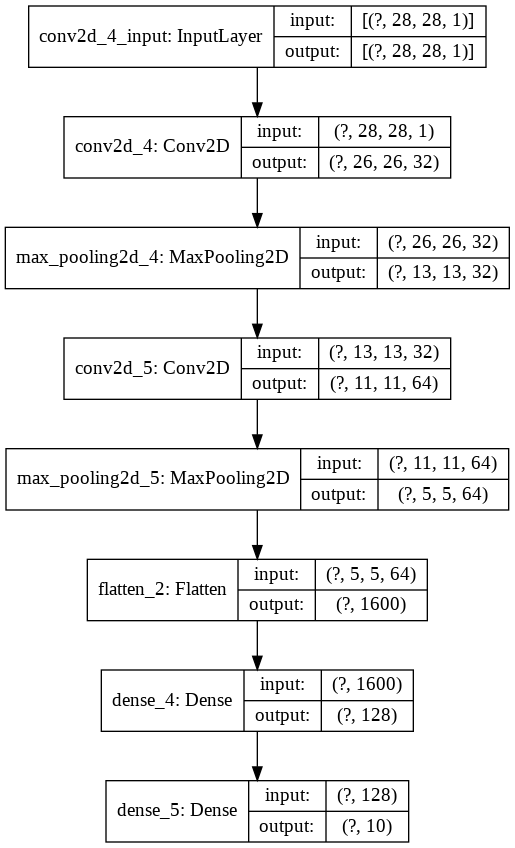

In [17]:
# You can also plot the model to a png file

plot_model(model, 'model.png', show_shapes=True)


## Train the model

In [16]:
history = model.fit(training_images, training_labels, epochs=5, validation_data=(training_images, training_labels))


Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.9283 - acc: 0.6533 - val_loss: 0.7091 - val_acc: 0.7348
Epoch 2/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.6527 - acc: 0.7546 - val_loss: 0.6335 - val_acc: 0.7639
Epoch 3/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.5794 - acc: 0.7825 - val_loss: 0.5451 - val_acc: 0.8005
Epoch 4/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.5281 - acc: 0.8025 - val_loss: 0.4983 - val_acc: 0.8180
Epoch 5/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.4957 - acc: 0.8151 - val_loss: 0.4840 - val_acc: 0.8159


## Plot the training vs validation accuracy and loss

In [0]:
%matplotlib inline

In [10]:
list(history.history)

['loss', 'acc', 'val_loss', 'val_acc']

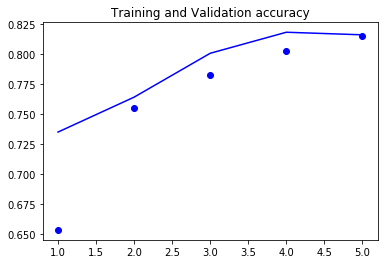

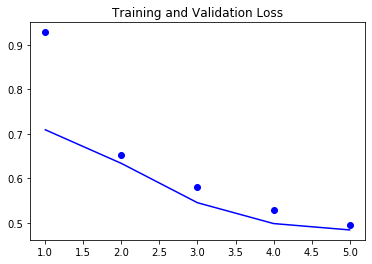

In [18]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.show()

We can see that model is doing vey well on both training and validation accuracy, achieving close to 99% accuracy. However, as you can see from the plots, the accuracy goes up and down as training epochs goes, it is a bit difficult to see the trend. We can smooth out the graph using smoothing average:


## Visualizing the Convolutions and Pooling

It is often said that deep learning network is a blackbox. However, this is certainly not true for Convnets. The representations learnt by Convnets are highly interpretable, as they are representations of visual concepts. 

The following codes allows us to visualize the output of the feature maps learnt by Convnet. By looking at output (activations) of these feature maps, for different kind of images, we will understand how a specific image is being classified. 


In [19]:
print(test_labels[:20])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


Let us look two different images: ankle boot (label 9) and trouser (label 1)

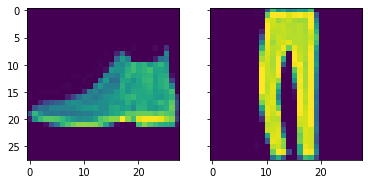

In [20]:
ANKLE_BOOT_IDX = 0
TROUSER_IDX = 2

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(test_images[ANKLE_BOOT_IDX].reshape(28,28))
ax2.imshow(test_images[TROUSER_IDX].reshape(28,28))
#print(test_labels[0])
#plt.imshow(test_images[0].reshape(28,28))
#print(test_labels[2])
#plt.imshow(test_images[2].reshape(28,28))

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras import Model

# extract the outputs of first four layers (only the Conv2D, MaxPooling2D layers)
layer_outputs = [layer.output for layer in model.layers][:4]

# create a model that will return these outputs given the model input
activation_model = Model(inputs = model.input, outputs = layer_outputs)

#print(len(layer_outputs))

Let's look at activations from the 1st Conv2D layer for both images. There are 64 filter maps from the 2nd Conv layer, but we going to look at only the first 10.

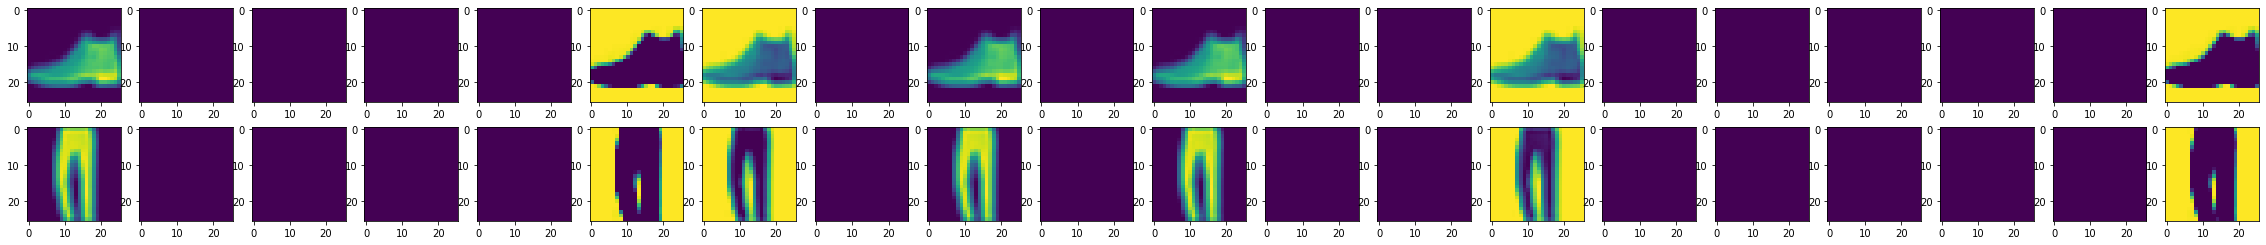

In [24]:
# let's us look at the first layer
fig, axarr = plt.subplots(2,20, figsize=(40,4))

# predict() outputs a list of 4 outputs of shape (1,26, 26, 64), with each corresponds to different layers
# We are interested in the 1st layer, so we take the index 0 of the predict() output
ankle_boot_activations_conv1 = activation_model.predict(test_images[ANKLE_BOOT_IDX].reshape(1, 28, 28, 1))[0]
trouser_activations_conv1 = activation_model.predict(test_images[TROUSER_IDX].reshape(1, 28, 28, 1))[0]

for filter_idx in range(0, 20):
    axarr[0, filter_idx].imshow(ankle_boot_activations_conv1[0,:,:, filter_idx])
    axarr[1, filter_idx].imshow(trouser_activations_conv1[0,:,:,filter_idx])



From the plots, we can see that 1st Conv layer seems to act as detector of lines and edges. Some filter such as filter 0 is more like an vertical line detector, whereas some filter such as filter 4 seems to detect edges of the shape.

Your filter output may not be the same as we have shown here as the specific filters learnt by the Conv layer are not deterministic.

Now, let's examine the activations from the 2nd Conv2D layer for both images. There are 64 filter maps from the 1st Conv layer, but we going to look at only the first 10. 

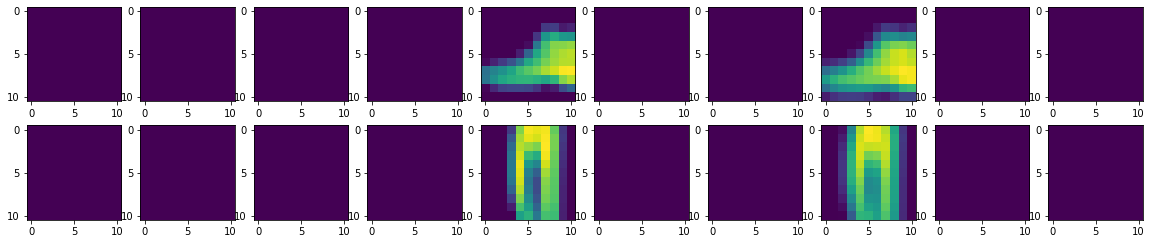

In [25]:
# let's us look at the end layer
fig, axarr = plt.subplots(2,10, figsize=(20,4))

ankle_boot_activations_conv2 = activation_model.predict(test_images[ANKLE_BOOT_IDX].reshape(1, 28, 28, 1))[2]
trouser_activations_conv2 = activation_model.predict(test_images[TROUSER_IDX].reshape(1, 28, 28, 1))[2]

for filter_idx in range(0, 10):
    axarr[0, filter_idx].imshow(ankle_boot_activations_conv2[0,:,:, filter_idx])
    axarr[1, filter_idx].imshow(trouser_activations_conv2[0,:,:,filter_idx])


Now the outputs seems to be more abstract and seems to detect a higher-level construct, such a the presence of certain part of the object (e.g. the collar part of the boot)

Now let's look at the last layer, which is the MaxPooling2D layer

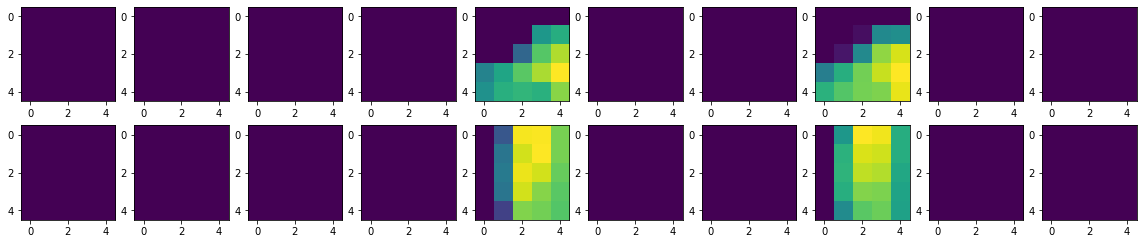

In [26]:
# let's us look at the last layer
fig, axarr = plt.subplots(2,10, figsize=(20,4))

ankle_boot_activations_pool2 = activation_model.predict(test_images[ANKLE_BOOT_IDX].reshape(1, 28, 28, 1))[3]
trouser_activations_pool2 = activation_model.predict(test_images[TROUSER_IDX].reshape(1, 28, 28, 1))[3]

for filter_idx in range(0, 10):
    axarr[0, filter_idx].imshow(ankle_boot_activations_pool2[0,:,:, filter_idx])
    axarr[1, filter_idx].imshow(trouser_activations_pool2[0,:,:,filter_idx])


The MaxPooling2D just highlight or emphasize more sharply the abstract part detected by the Conv layer. 

**Additional Exercises:**

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.








In [27]:
### Start your code here ###
model1a = Sequential([ 
                    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)), 
                    MaxPooling2D(2, 2), 
                    Conv2D(64, (3,3), activation='relu'), 
                    MaxPooling2D(2,2), 
                    Flatten(), 
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax') 
                    ])
model1a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model1a.fit(training_images, training_labels, epochs=5, validation_data=(training_images, training_labels))

### End your code @@@


Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.8962 - acc: 0.6669 - val_loss: 0.7139 - val_acc: 0.7166
Epoch 2/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.6469 - acc: 0.7556 - val_loss: 0.5927 - val_acc: 0.7771
Epoch 3/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.5744 - acc: 0.7824 - val_loss: 0.5652 - val_acc: 0.7939
Epoch 4/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.5286 - acc: 0.8018 - val_loss: 0.5026 - val_acc: 0.8135
Epoch 5/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.4899 - acc: 0.8166 - val_loss: 0.4603 - val_acc: 0.8286


In [0]:
### Start your code here ###
model1b = Sequential([ 
                    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), 
                    MaxPooling2D(2, 2), 
                    Conv2D(64, (3,3), activation='relu'), 
                    MaxPooling2D(2,2), 
                    Flatten(), 
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax') 
                    ])
model1b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model1b.fit(training_images, training_labels, epochs=5, validation_data=(training_images, training_labels))

### End your code @@@


2. Remove the final Convolution. What impact will this have on accuracy or training time?

In [28]:
### Start your code here ###
model2 = Sequential([ 
                    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), 
                    MaxPooling2D(2, 2), 
                    Flatten(), 
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax') 
                    ])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(training_images, training_labels, epochs=5, validation_data=(training_images, training_labels))

### End your code @@@


Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.8994 - acc: 0.6832 - val_loss: 0.6044 - val_acc: 0.7670
Epoch 2/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.5533 - acc: 0.7974 - val_loss: 0.5009 - val_acc: 0.8204
Epoch 3/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.4832 - acc: 0.8250 - val_loss: 0.4670 - val_acc: 0.8303
Epoch 4/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4381 - acc: 0.8432 - val_loss: 0.4200 - val_acc: 0.8491
Epoch 5/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4129 - acc: 0.8528 - val_loss: 0.3966 - val_acc: 0.8587


3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

In [0]:
### Start your code here ###
model3 = Sequential([ 
                    Conv2D(64, (3,3), activation='relu', padding='SAME', input_shape=(28, 28, 1)), 
                    MaxPooling2D(2, 1, padding='SAME', ), 
                    Conv2D(64, (3,3), strides=1, padding='SAME',activation='relu'), 
                    MaxPooling2D(2,1, padding='SAME'),                       
                    Conv2D(64, (3,3), padding='SAME',activation='relu'), 
                    MaxPooling2D(2,1, padding='SAME'),  
                    Conv2D(64, (3,3), padding='SAME',activation='relu'), 
                    MaxPooling2D(2,1, padding='SAME'),                     
                    Flatten(), 
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax') 
                    ])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### End your code @@@


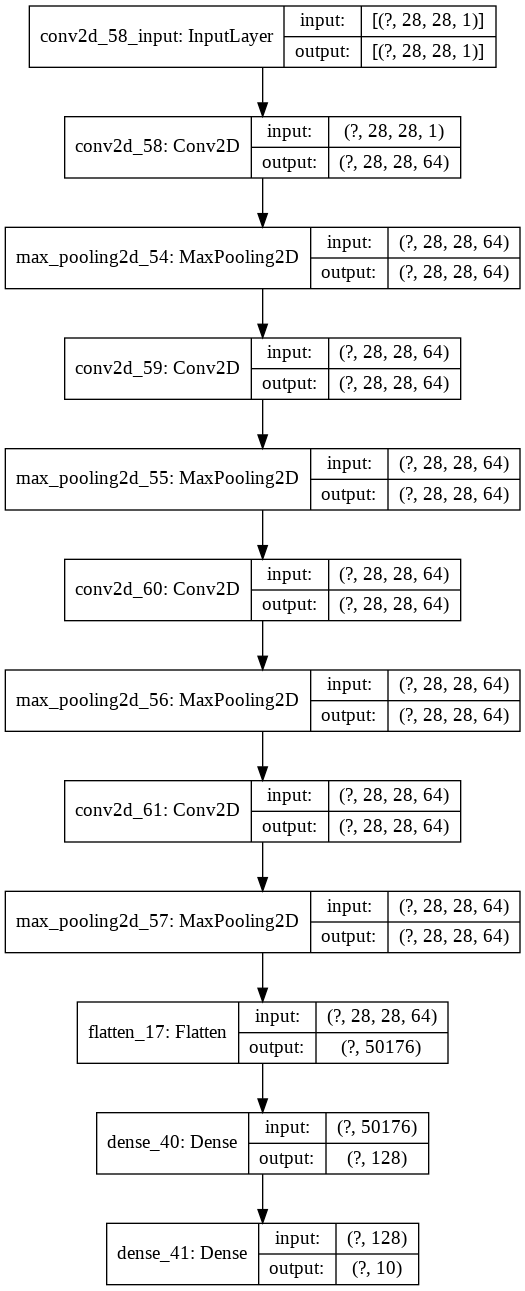

In [56]:
plot_model(model3, show_shapes=True)

In [57]:
history = model3.fit(training_images, training_labels, epochs=2, validation_data=(training_images, training_labels))

Train on 60000 samples, validate on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 22s 361us/sample - loss: 2.3028 - acc: 0.0984 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/2
60000/60000 [==============================] - 21s 351us/sample - loss: 2.3028 - acc: 0.1002 - val_loss: 2.3026 - val_acc: 0.1000


4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 


In [59]:
### Start your code here ###
model4 = Sequential([ 
                    Conv2D(32, (3,3), strides=1, padding='SAME', activation='relu', input_shape=(28, 28, 1)), 
                    MaxPooling2D(2, 2, padding='SAME'),   
                    Flatten(),   
                    Dense(10, activation='softmax') 
                    ])
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model4.fit(training_images, training_labels, epochs=5, validation_data=(training_images, training_labels))

### End your code @@@


Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 178us/sample - loss: 1.0528 - acc: 0.6653 - val_loss: 0.6612 - val_acc: 0.7653
Epoch 2/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.6068 - acc: 0.7822 - val_loss: 0.5670 - val_acc: 0.7951
Epoch 3/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.5404 - acc: 0.8073 - val_loss: 0.5164 - val_acc: 0.8177
Epoch 4/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.5064 - acc: 0.8211 - val_loss: 0.4917 - val_acc: 0.8263
Epoch 5/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.4844 - acc: 0.8290 - val_loss: 0.4717 - val_acc: 0.8347
